In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from numpy import random
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px # data visualization

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
import sklearn.metrics as metrics
import statsmodels.api as sm

# %config InlineBackend.figure_formats =['retina']  # or svg
%matplotlib inline

In [2]:
#https://stackoverflow.com/questions/57671229/nameerror-name-metrics-is-not-defined
!pip install metrics

In [3]:
rent = pd.read_csv("Rent_After_Eda.csv")

In [4]:
rent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 843 entries, 0 to 842
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Price                   843 non-null    int64
 1   Size                    843 non-null    int64
 2   Bath                    843 non-null    int64
 3   Bed                     843 non-null    int64
 4   City_Lisboa             843 non-null    int64
 5   City_Matosinhos         843 non-null    int64
 6   City_Oeiras             843 non-null    int64
 7   City_Other              843 non-null    int64
 8   City_Porto              843 non-null    int64
 9   City_Sintra             843 non-null    int64
 10  City_Vila Nova de Gaia  843 non-null    int64
dtypes: int64(11)
memory usage: 72.6 KB


In [5]:
rent.head(10)

,Price,Size,Bath,Bed,City_Lisboa,City_Matosinhos,City_Oeiras,City_Other,City_Porto,City_Sintra,City_Vila Nova de Gaia
0,950,57,1,1,0,0,0,0,0,0,0
1,1900,139,2,3,0,0,0,0,0,0,0
2,1900,139,2,3,0,0,0,0,0,0,0
3,850,55,1,2,1,0,0,0,0,0,0
4,2350,112,2,2,1,0,0,0,0,0,0
5,1500,65,1,2,1,0,0,0,0,0,0
6,1700,95,2,2,1,0,0,0,0,0,0
7,800,77,1,2,0,0,0,0,0,1,0
8,1600,91,2,2,1,0,0,0,0,0,0
9,980,46,1,1,1,0,0,0,0,0,0


# start to Train the model,
# end game is to get a predicted rent price

In [6]:
# Train/test split
X = rent.drop(columns = ['Price'])
y = rent['Price']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

col = ['Size', 'Bath', 'Bed']
scaler = RobustScaler().fit(X_train[col])
X_train[col] = scaler.transform(X_train[col])

In [8]:
X_train.head(10)


,Size,Bath,Bed,City_Lisboa,City_Matosinhos,City_Oeiras,City_Other,City_Porto,City_Sintra,City_Vila Nova de Gaia
447,0.000000,1.0,0.0,1,0,0,0,0,0,0
484,0.181818,1.0,0.0,1,0,0,0,0,0,0
104,0.254545,1.0,0.0,1,0,0,0,0,0,0
451,-0.472727,0.0,0.0,1,0,0,0,0,0,0
202,0.254545,1.0,0.0,1,0,0,0,0,0,0
491,1.054545,1.0,1.0,0,0,0,0,0,0,0
100,1.054545,1.0,1.0,0,0,0,0,0,0,0
741,0.381818,1.0,0.0,0,1,0,0,0,0,0
294,-0.436364,0.0,-1.0,0,0,0,0,0,0,0
327,-0.290909,0.0,0.0,1,0,0,0,0,0,0


In [9]:
#Scale features using statistics that are robust to outliers.
scaler = RobustScaler().fit(X_test[col])
X_test[col] = scaler.transform(X_test[col])

In [10]:
lm_scaled = LinearRegression()
lm_scaled.fit(X_train, y_train)

LinearRegression()

In [11]:
cdf_scaled = pd.DataFrame(lm_scaled.coef_, index=X_train.columns, columns = ['coefficients'])
cdf_scaled

,coefficients
Size,1150.099011
Bath,-101.628840
Bed,-276.185831
City_Lisboa,397.709874
City_Matosinhos,-180.346318
City_Oeiras,186.763376
City_Other,-635.144197
City_Porto,308.233749
City_Sintra,-255.935272
City_Vila Nova de Gaia,-251.025904


In [12]:
# checking R2 for train/test
print(lm_scaled.score(X_train, y_train))
print(lm_scaled.score(X_test, y_test))

0.8875569437256136
0.8635638999755737


In [13]:
y_pred = lm_scaled.predict(X_test)

In [14]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 158.89014579244537
Mean Squared Error: 52750.178621419174
Root Mean Squared Error: 229.67407041592477


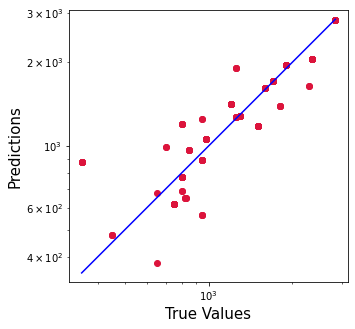

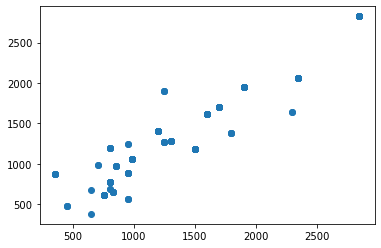

In [15]:
# actual vs predicted

plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_test), max(y_pred))
p2 = min(min(y_test), min(y_pred))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

plt.scatter(y_test, y_pred)  


In [16]:
# combining the predicted value with input
X_test['predicted_rent'] = y_pred
# prediction for all data
scaler = RobustScaler().fit(X[col])
X[col] = scaler.transform(X[col])
y_pred_all = lm_scaled.predict(X)
residuals_all = y - y_pred_all

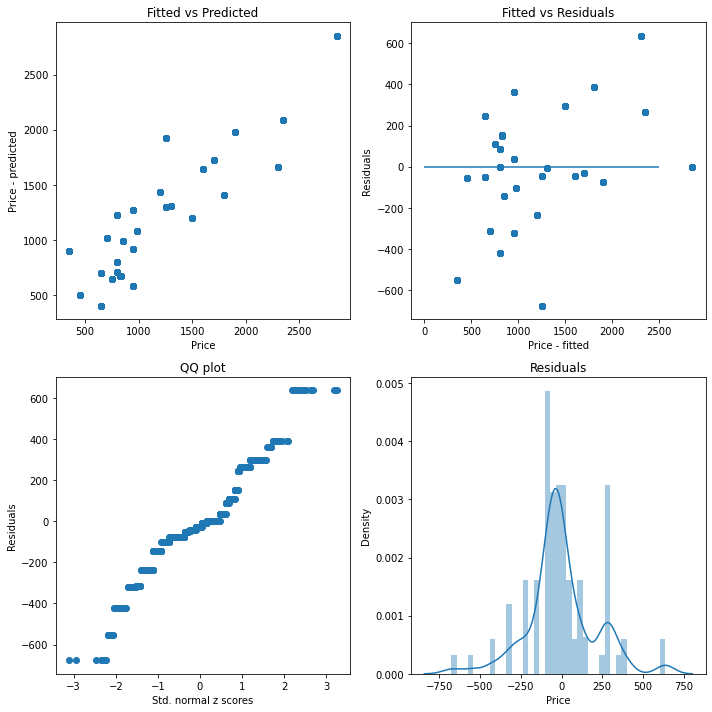

In [17]:
# Evaluate model using charts for all data
fig, axs = plt.subplots(2,2, figsize=(10,10))

plt1 = axs[0][0].scatter(x=y, y=y_pred_all)
axs[0][0].set_title('Fitted vs Predicted')
axs[0][0].set_xlabel('Price')
axs[0][0].set_ylabel('Price - predicted')

plt2 = axs[0][1].scatter(x=y, y=residuals_all)
axs[0][1].hlines(0, xmin=0, xmax=2500)
axs[0][1].set_title('Fitted vs Residuals')
axs[0][1].set_xlabel('Price - fitted')
axs[0][1].set_ylabel('Residuals')

plt3 = axs[1][0].scatter(x=sorted(random.randn(len(residuals_all))), y=sorted(residuals_all))
axs[1][0].set_title('QQ plot')
axs[1][0].set_xlabel('Std. normal z scores')
axs[1][0].set_ylabel('Residuals')

plt4 = sns.distplot(residuals_all, ax=axs[1][1])
axs[1][1].set_title('Residuals')
plt.tight_layout()

In [18]:
# model without zscoring

# Train/test split
X = rent.drop(columns = ['Price'])
y = rent['Price']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [19]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [20]:
# checking R2 for train/test
print(lm.score(X_train, y_train))
print(lm.score(X_test, y_test))

0.8847750260910294
0.871092655711891


In [21]:
y_pred = lm.predict(X_test)

In [22]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 150.41363118102055
Mean Squared Error: 50762.707496828414
Root Mean Squared Error: 225.30580883951575


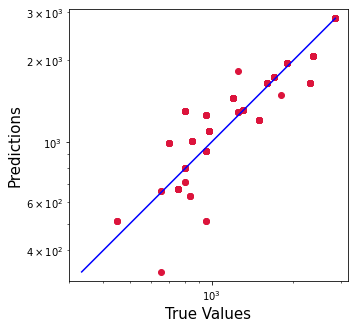

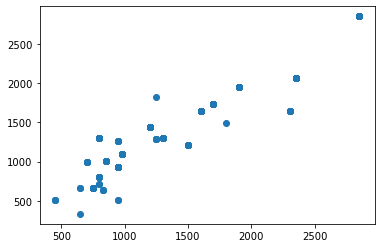

In [23]:
# actual vs predicted

plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_test), max(y_pred))
p2 = min(min(y_test), min(y_pred))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

plt.scatter(y_test, y_pred)  


In [24]:
# combining the predicted value with input
X_test['predicted_rent'] = y_pred
# prediction for all data
y_pred_all = lm.predict(X)
residuals_all = y - y_pred_all

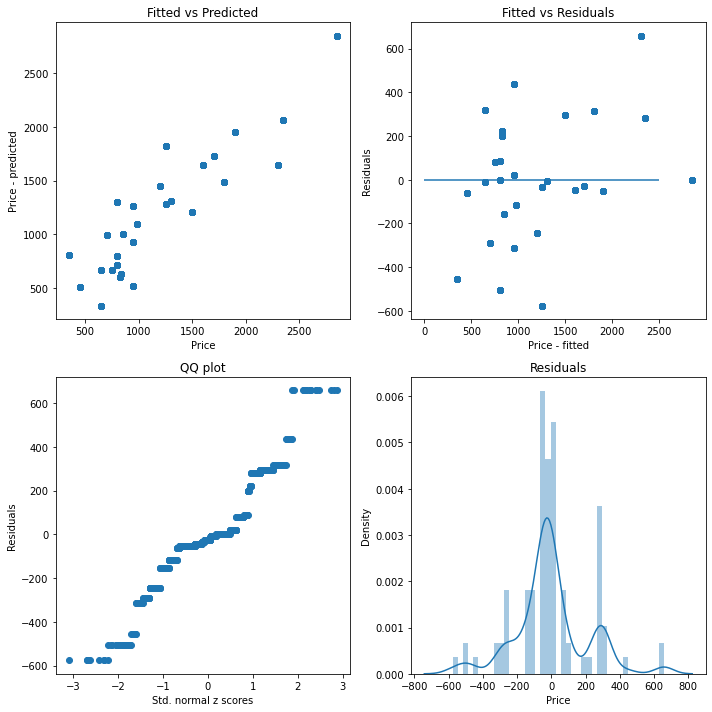

In [25]:
# Evaluate model using charts for all data
fig, axs = plt.subplots(2,2, figsize=(10,10))

plt1 = axs[0][0].scatter(x=y, y=y_pred_all)
axs[0][0].set_title('Fitted vs Predicted')
axs[0][0].set_xlabel('Price')
axs[0][0].set_ylabel('Price - predicted')

plt2 = axs[0][1].scatter(x=y, y=residuals_all)
axs[0][1].hlines(0, xmin=0, xmax=2500)
axs[0][1].set_title('Fitted vs Residuals')
axs[0][1].set_xlabel('Price - fitted')
axs[0][1].set_ylabel('Residuals')

plt3 = axs[1][0].scatter(x=sorted(random.randn(len(residuals_all))), y=sorted(residuals_all))
axs[1][0].set_title('QQ plot')
axs[1][0].set_xlabel('Std. normal z scores')
axs[1][0].set_ylabel('Residuals')

plt4 = sns.distplot(residuals_all, ax=axs[1][1])
axs[1][1].set_title('Residuals')
plt.tight_layout()

In [26]:
df_buy = pd.read_csv('buy_after_eda.csv')

In [27]:
df_buy.head()

,Price,Prop_type,Size,Bath,Bed,City,Division
0,350000,1,233,4,4,Maia,Castêlo da Maia
1,98000,1,60,1,2,Paredes,Lordelo
2,199900,1,188,3,3,Amarante,Telões
3,235000,1,200,2,3,Marco de Canaveses,Tabuado
4,250000,1,120,2,5,Gondomar,Rio Tinto


In [28]:
# dropping prop_type , to To adapt the form of the table of properties for purchase to the 
# form of the table of properties for rent
df_buy.drop(['Prop_type', 'Division'],1, inplace=True) 

In [29]:
city_count = df_buy['City'].value_counts()
city_count.head(10)

   Lisboa                 1483
   Sintra                  830
Vila Nova de Gaia          666
   Cascais                 557
Braga                      462
Guimarães                  460
Gondomar                   387
   Vila Franca de Xira     378
   Amadora                 375
Porto                      313
Name: City, dtype: int64

In [30]:
# categorize minor divisions as 'other'
minor_city = list(city_count[city_count <= 380].index)
df_buy['City'] = df_buy['City'].replace(minor_city, 'Other')
df_buy['City'].value_counts()


Other                4202
   Lisboa            1483
   Sintra             830
Vila Nova de Gaia     666
   Cascais            557
Braga                 462
Guimarães             460
Gondomar              387
Name: City, dtype: int64

In [31]:
# creating dummy variables for Division
df_buy = pd.get_dummies(df_buy, drop_first = True)

In [32]:
df_buy.head(15)

,Price,Size,Bath,Bed,City_Gondomar,City_Guimarães,City_Other,City_Vila Nova de Gaia,City_ Cascais,City_ Lisboa,City_ Sintra
0,350000,233,4,4,0,0,1,0,0,0,0
1,98000,60,1,2,0,0,1,0,0,0,0
2,199900,188,3,3,0,0,1,0,0,0,0
3,235000,200,2,3,0,0,1,0,0,0,0
4,250000,120,2,5,1,0,0,0,0,0,0
5,195000,134,2,3,0,0,1,0,0,0,0
6,375000,208,4,6,0,0,1,0,0,0,0
7,380000,207,3,4,1,0,0,0,0,0,0
8,338500,158,2,2,0,0,1,0,0,0,0
9,125000,86,1,3,0,0,1,0,0,0,0


In [33]:
df_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9047 entries, 0 to 9046
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Price                   9047 non-null   int64
 1   Size                    9047 non-null   int64
 2   Bath                    9047 non-null   int64
 3   Bed                     9047 non-null   int64
 4   City_Gondomar           9047 non-null   uint8
 5   City_Guimarães          9047 non-null   uint8
 6   City_Other              9047 non-null   uint8
 7   City_Vila Nova de Gaia  9047 non-null   uint8
 8   City_   Cascais         9047 non-null   uint8
 9   City_   Lisboa          9047 non-null   uint8
 10  City_   Sintra          9047 non-null   uint8
dtypes: int64(4), uint8(7)
memory usage: 344.7 KB


In [34]:
X = df_buy.drop(columns = ['Price'])
df_buy['predicted_rent'] = lm.predict(X)

In [35]:
df_buy.head(20) # rent value added

,Price,Size,Bath,Bed,City_Gondomar,City_Guimarães,City_Other,City_Vila Nova de Gaia,City_ Cascais,City_ Lisboa,City_ Sintra,predicted_rent
0,350000,233,4,4,0,0,1,0,0,0,0,3632.417242
1,98000,60,1,2,0,0,1,0,0,0,0,944.463831
2,199900,188,3,3,0,0,1,0,0,0,0,3081.179349
3,235000,200,2,3,0,0,1,0,0,0,0,3402.970136
4,250000,120,2,5,1,0,0,0,0,0,0,1414.624888
5,195000,134,2,3,0,0,1,0,0,0,0,2077.920502
6,375000,208,4,6,0,0,1,0,0,0,0,2587.839765
7,380000,207,3,4,1,0,0,0,0,0,0,3351.740922
8,338500,158,2,2,0,0,1,0,0,0,0,2831.089101
9,125000,86,1,3,0,0,1,0,0,0,0,1195.120712


In [36]:
df_buy.to_csv(r'Buy_After_Predicted_Rent.csv', index = False, header=True)